In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [6]:
config_file = 'saves/pspnet_all/pspnet_r50-d8_512x512_80k_loveda.py'
#config_file="work_dirs/fcn_unet_s5-d16_64x64_40k_drive/fcn_unet_s5-d16_64x64_40k_drive.py"

load checkpoint from local path: work_dirs/pspnet_r50-d8_512x512_80k_loveda/iter_800.pth


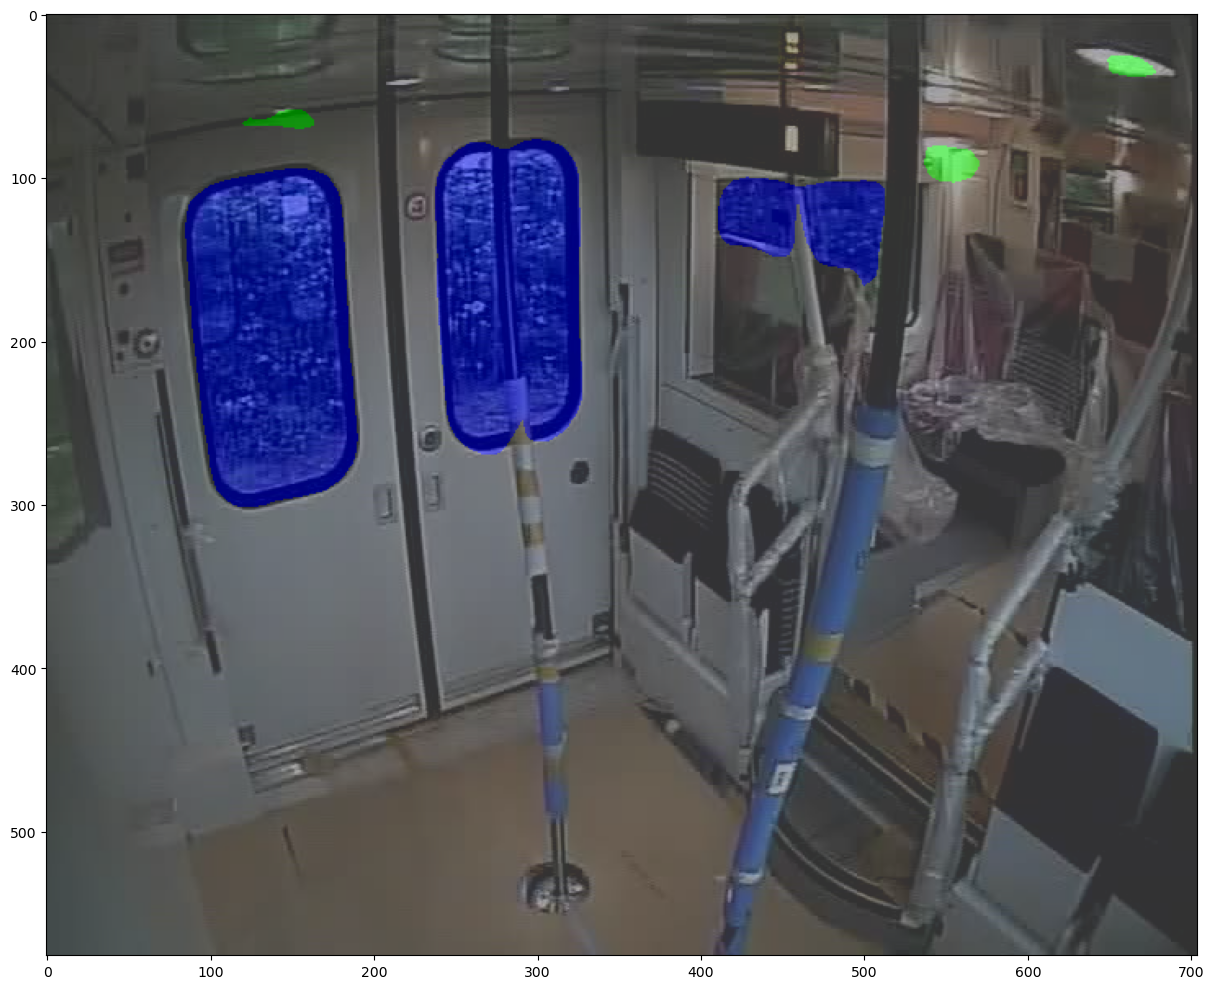

In [16]:
model = init_segmentor(config_file,checkpoint="work_dirs/pspnet_r50-d8_512x512_80k_loveda/iter_800.pth", device='cpu')
# test a single image
img = '../Dataset/img_dir/Train/C1_CAM(VS-1).V5_20.jpg'
result = inference_segmentor(model,img)
# show the results
show_result_pyplot(model, img, result, palette=[[100,100,100],[0, 255, 0],[0,255,0],[0,0,255]])

load checkpoint from local path: work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1200.pth


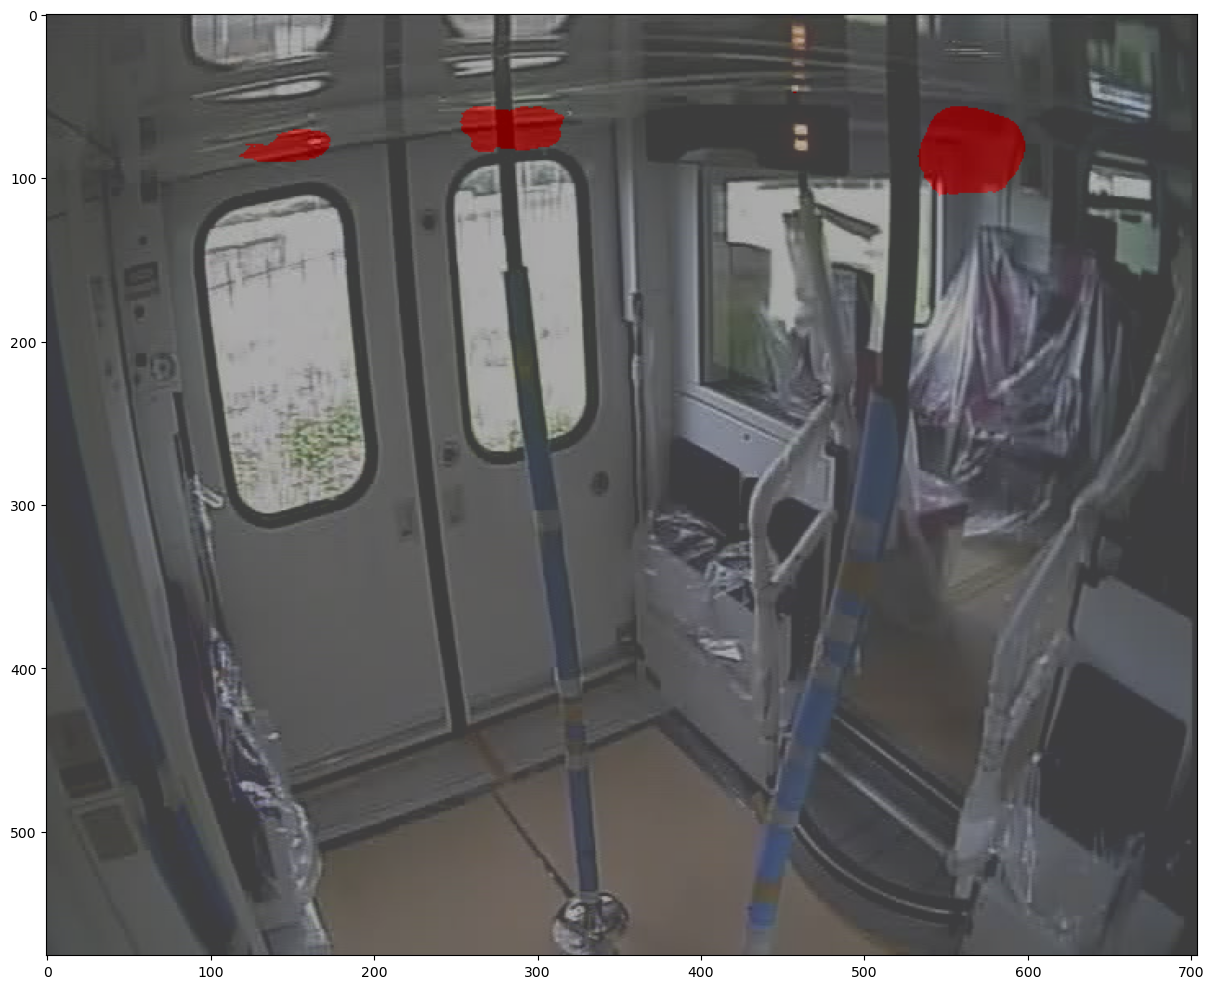

In [42]:
model = init_segmentor(config_file,checkpoint="work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1200.pth", device='cpu')
# test a single image
img = '../Dataset/img_dir/Val/C4_CAM(VS-4).V5_20.jpg'
result = inference_segmentor(model,img)
# show the results
show_result_pyplot(model, img, result, palette=[[255, 0, 0], [120, 120,120]])

load checkpoint from local path: work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1500.pth


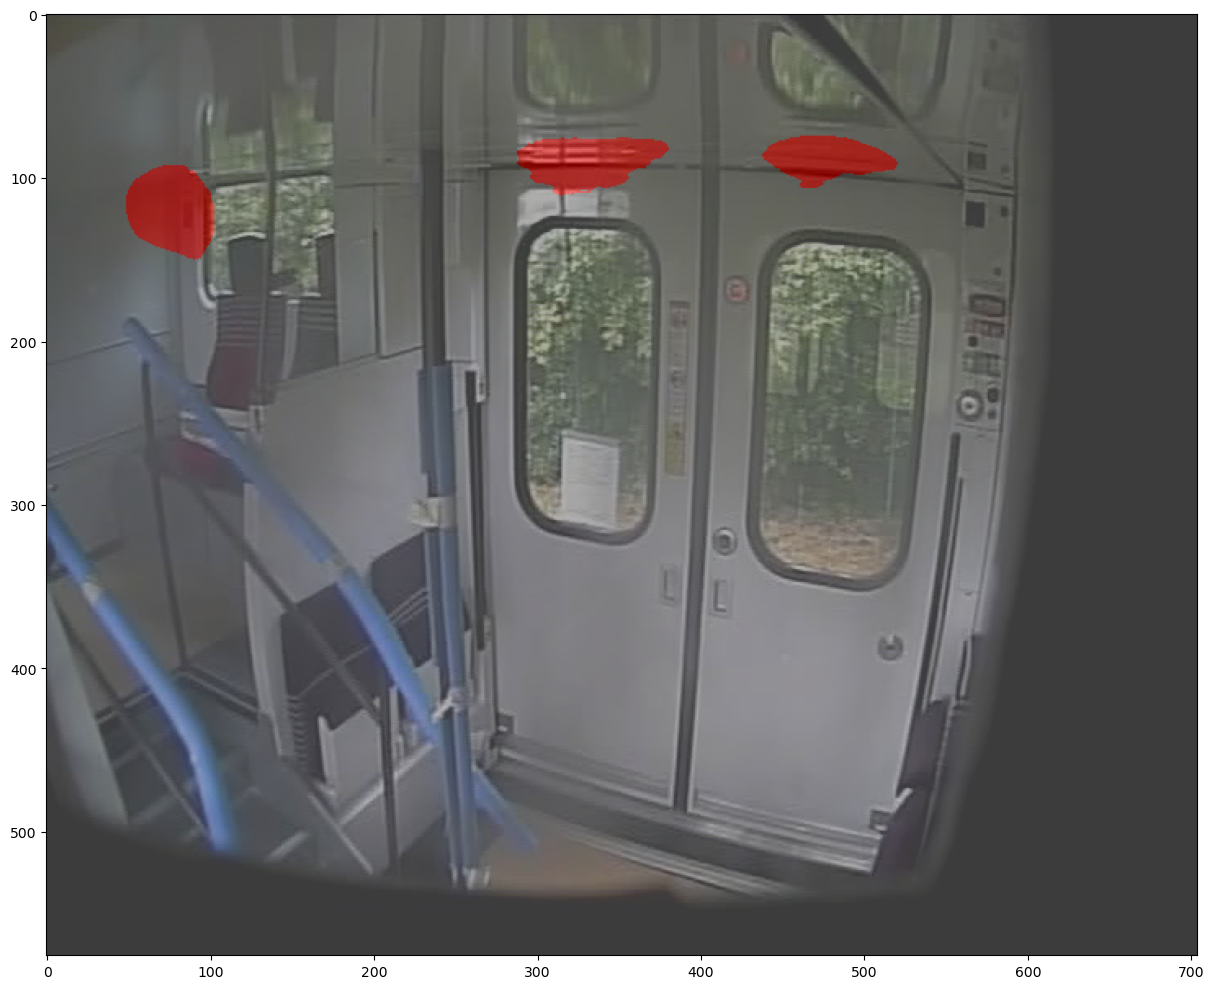

In [35]:
model = init_segmentor(config_file,checkpoint="work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1500.pth", device='cpu')
# test a single image
img = '../Dataset/img_dir/Train/C1_CAM(VS-).V6_20.jpg'
result = inference_segmentor(model,img)
# show the results
show_result_pyplot(model, img, result, palette=[[255, 0, 0], [120, 120,120]])

load checkpoint from local path: work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1800.pth


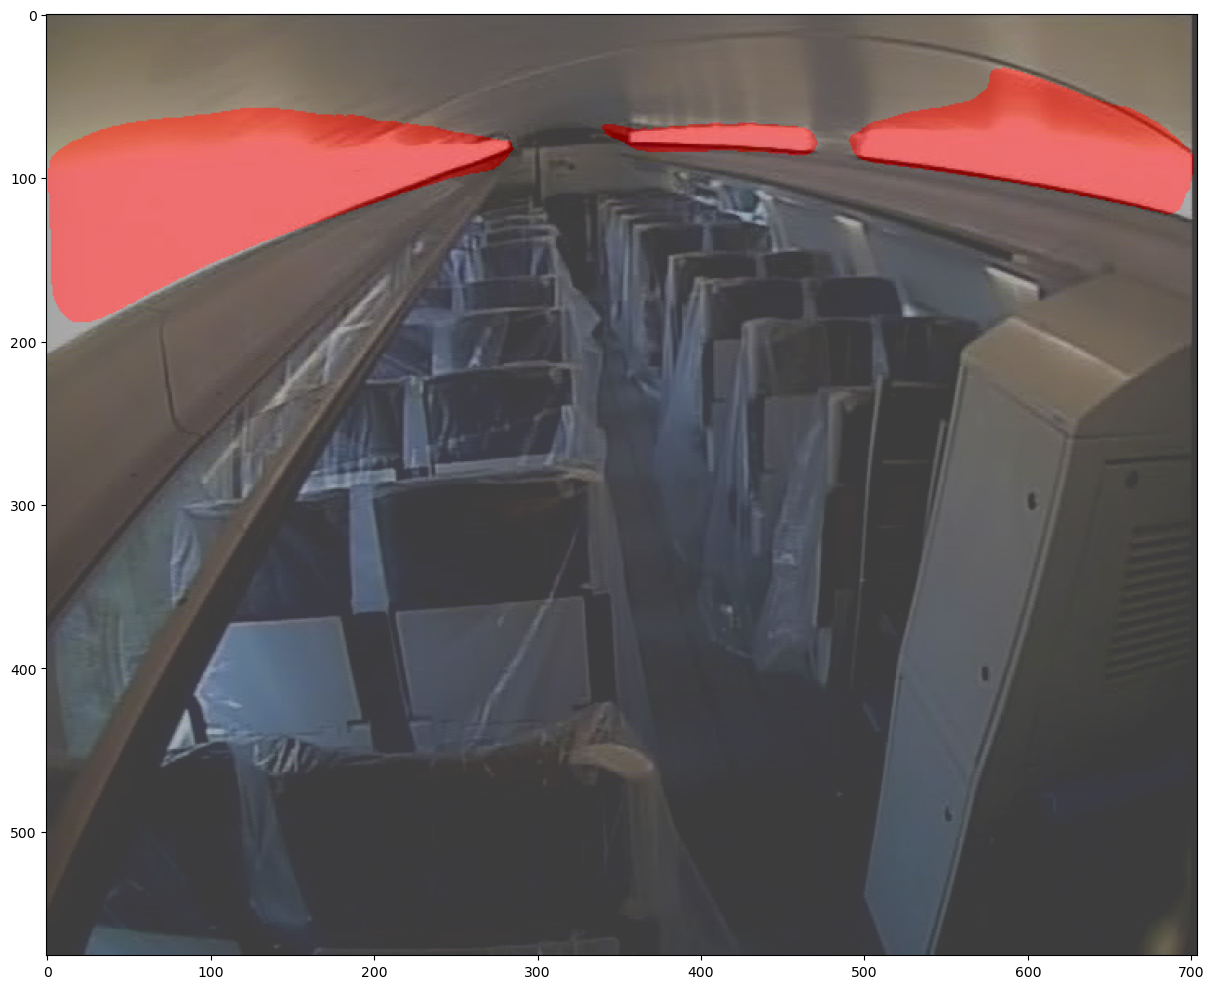

In [5]:
model = init_segmentor(config_file,checkpoint="work_dirs/fcn_unet_s5-d16_64x64_40k_drive/iter_1800.pth", device='cpu')
# test a single image
img = '../Dataset/img_dir/Val/C3_CAM(VS-1).V2_20.jpg'
result = inference_segmentor(model,img)
# show the results
show_result_pyplot(model, img, result, palette=[[255, 0, 0], [120, 120,120]])

In [10]:
from PIL import Image
from numpy import array
import numpy as np
im_1 = Image.open("../Dataset/ann2_dir/Val/C4_CAM(VS-4).V5_01.png")
print(np.where(array(im_1)==3))

(array([ 83,  83,  83, ..., 306, 306, 306]), array([306, 307, 308, ..., 142, 143, 144]))


In [20]:
from mmcv.utils import Config
from mmseg.datasets import build_dataset,build_dataloader

cfg = Config.fromfile("./configs/_base_/datasets/lamp.py")
dataset = build_dataset(cfg.data.train)

2023-01-24 11:45:44,883 - mmseg - INFO - Loaded 1696 images


In [21]:
loader_cfg = dict(
        # cfg.gpus will be ignored if distributed
        num_gpus=1,
        dist=False,
        seed=456,
        drop_last=True)
    # The overall dataloader settings
loader_cfg.update({
        k: v
        for k, v in cfg.data.items() if k not in [
            'train', 'val', 'test', 'train_dataloader', 'val_dataloader',
            'test_dataloader'
        ]
    })

    # The specific dataloader settings
train_loader_cfg = {**loader_cfg, **cfg.data.get('train_dataloader', {})}
data_loader = build_dataloader(dataset, **train_loader_cfg)

In [26]:
for d in data_loader:
    print(d)

{'img_metas': DataContainer([[{'filename': '../Dataset/img_dir/Train/C3_CAM(VS-4).V6_03.jpg', 'ori_filename': 'C3_CAM(VS-4).V6_03.jpg', 'ori_shape': (576, 704, 3), 'img_shape': (640, 640, 3), 'pad_shape': (640, 640, 3), 'scale_factor': array([1.4488636, 1.4496528, 1.4488636, 1.4496528], dtype=float32), 'flip': False, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}, {'filename': '../Dataset/img_dir/Train/C3_CAM(VS-1).V6_04.jpg', 'ori_filename': 'C3_CAM(VS-1).V6_04.jpg', 'ori_shape': (576, 704, 3), 'img_shape': (640, 640, 3), 'pad_shape': (640, 640, 3), 'scale_factor': array([1.4474431, 1.4479166, 1.4474431, 1.4479166], dtype=float32), 'flip': False, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}, {'filename': '../Dataset/img_d

KeyboardInterrupt: 

In [23]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [24]:
from mmcv.utils import Config
from mmseg.datasets import build_dataset

cfg=Config.fromfile("saves/Lamp_det_fcn-unet/fcn_unet_s5-d16_64x64_40k_drive.py")
dataset= build_dataset(cfg.data.train)
a=dataset.prepare_train_img(60)
print(a['gt_semantic_seg'])

2023-01-26 09:51:03,574 - mmseg - INFO - Loaded 1696 images


DataContainer(tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]]))
